In [2]:
!pip install opencv-python numpy matplotlib

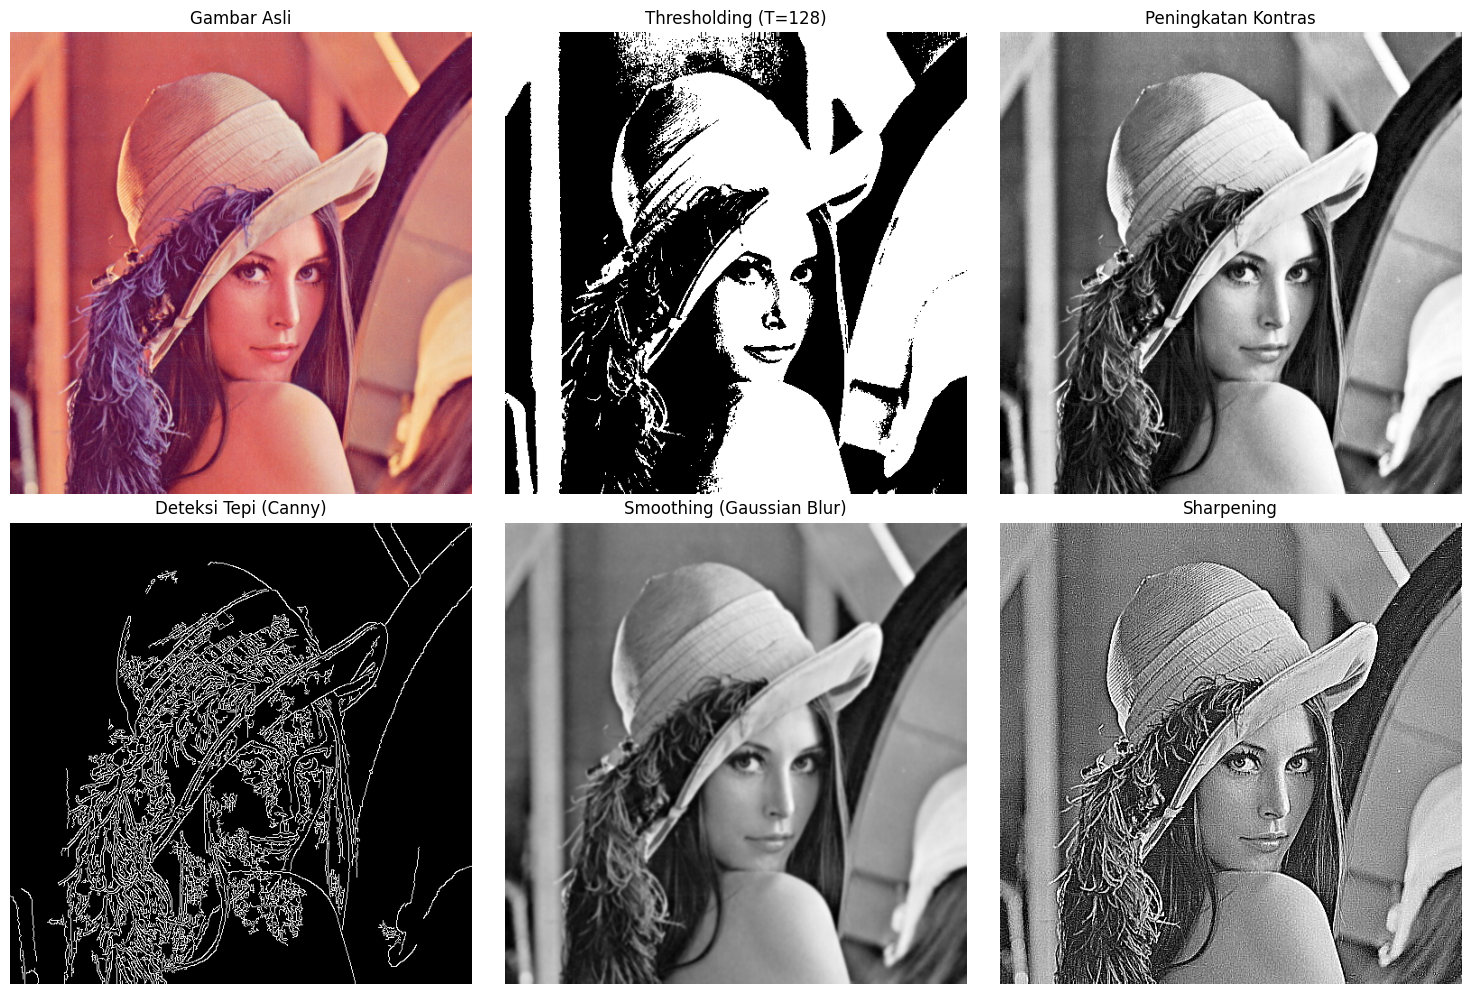

In [8]:
def main():
    """Menggabungkan berbagai teknik pemrosesan citra menggunakan gambar dari URL."""
    # Baris 1: Mengatur URL gambar. Anda harus menggantinya dengan URL gambar yang valid.
    image_url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'

    # Baris 2: Memanggil fungsi untuk mengunduh gambar.
    img_color = load_image_from_url(image_url)

    # Baris 3: Jika pengunduhan gagal, keluar dari fungsi.
    if img_color is None:
        return

    # Baris 4: Mengonversi gambar berwarna ke skala abu-abu. Banyak operasi (seperti deteksi tepi) lebih sederhana pada grayscale.
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Baris 5: Membuat jendela plot untuk menampilkan 6 gambar dalam grid 2x3.
    plt.figure(figsize=(15, 10))

    # Baris 6: Menampilkan gambar asli. Perlu dikonversi dari BGR ke RGB agar warnanya benar di matplotlib.
    plt.subplot(2, 3, 1) # Menentukan lokasi plot: baris 2, kolom 3, posisi 1
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off') # Menyembunyikan sumbu

    # --- Bagian Thresholding ---
    # Baris 7: Menerapkan ambang batas 128. Piksel di atas 128 menjadi 255 (putih), yang lain menjadi 0 (hitam).
    _, binary_img = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
    plt.subplot(2, 3, 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title('Thresholding (T=128)')
    plt.axis('off')

    # --- Bagian Peningkatan Kontras ---
    # Baris 8: Menerapkan equalisasi histogram untuk meningkatkan kontras secara otomatis.
    enhanced_img = cv2.equalizeHist(img_gray)
    plt.subplot(2, 3, 3)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title('Peningkatan Kontras')
    plt.axis('off')

    # --- Bagian Deteksi Tepi ---
    # Baris 9: Menggunakan algoritma Canny untuk mendeteksi tepi. Nilai 100 dan 200 adalah ambang batas untuk deteksi.
    edges = cv2.Canny(img_gray, 100, 200)
    plt.subplot(2, 3, 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Deteksi Tepi (Canny)')
    plt.axis('off')

    # --- Bagian Filtering ---
    # Baris 10: Menggunakan filter Gaussian blur dengan kernel 5x5 untuk menghaluskan gambar.
    smoothed_img = cv2.GaussianBlur(img_gray, (5, 5), 0)
    plt.subplot(2, 3, 5)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Smoothing (Gaussian Blur)')
    plt.axis('off')

    # Baris 11: Mendefinisikan kernel 3x3 untuk operasi mempertajam (sharpening).
    kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    # Baris 12: Menerapkan kernel pada gambar menggunakan konvolusi 2D.
    sharpened_img = cv2.filter2D(img_gray, -1, kernel_sharpening)
    plt.subplot(2, 3, 6)
    plt.imshow(sharpened_img, cmap='gray')
    plt.title('Sharpening')
    plt.axis('off')

    # Baris 13: Menyesuaikan tata letak agar judul dan gambar tidak tumpang tindih.
    plt.tight_layout()
    # Baris 14: Menampilkan semua plot.
    plt.show()

# --- Bagian Eksekusi Kode ---
# Baris 15: Memastikan fungsi main() hanya dijalankan saat skrip dieksekusi langsung.
if __name__ == "__main__":
    main()